In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
%matplotlib notebook

In [4]:
path = ('/home/ccet/Self-Supervised-Learning/covid/archive(1)')

In [5]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
data=ImageDataLoaders.from_path_func(path, fnames, label_func,  valid_pct=0.2, seed=None, item_tfms=Resize(224), bs=64)


In [6]:
learn = cnn_learner(data, models.densenet201, metrics= [accuracy, Precision(average='micro'), F1Score(average='micro')])

In [7]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.625698,0.162860,0.950198,0.950198,0.950198,01:09
1,0.220809,0.057904,0.979447,0.979447,0.979447,00:43
2,0.102579,0.053694,0.978656,0.978656,0.978656,00:43
3,0.053471,0.049960,0.983399,0.983399,0.983399,00:42
4,0.033765,0.041529,0.985771,0.985771,0.985771,00:42
5,0.020499,0.044857,0.988933,0.988933,0.988933,00:42


<IPython.core.display.Javascript object>


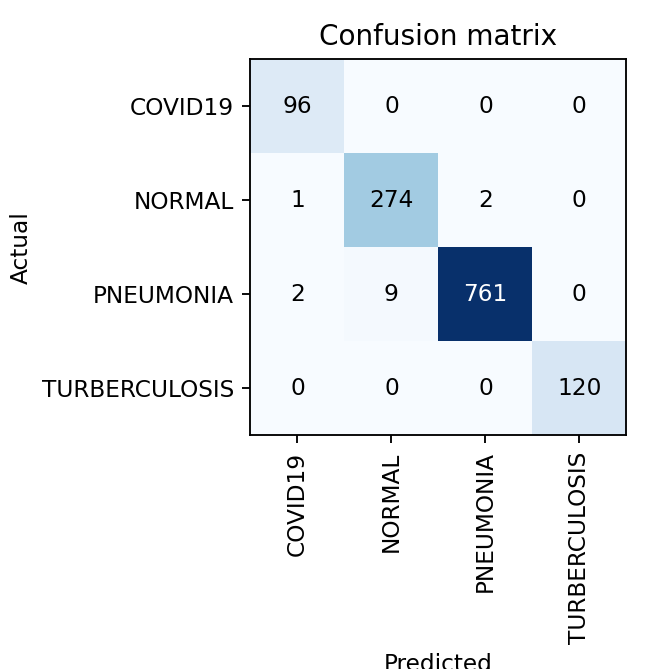

In [12]:
Interp = ClassificationInterpretation.from_learner(learn)
Interp.plot_confusion_matrix(figsize=(4,4),dpi=120)

In [16]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))


The accuracy is 0.9889327883720398 %.


In [14]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9991303585261404


<IPython.core.display.Javascript object>


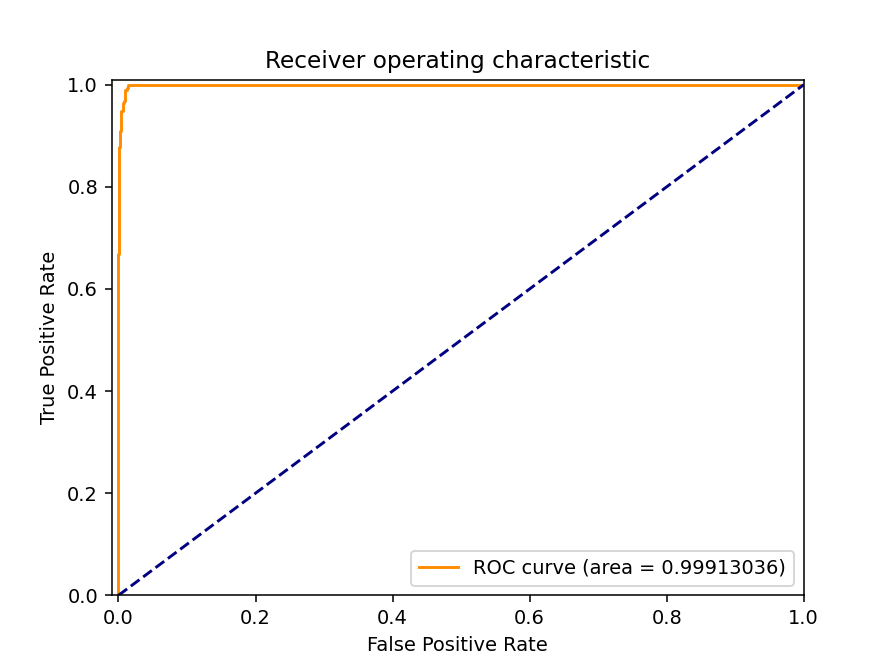

In [17]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.8f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
